# How do each of the schools differ in their overall approach to law?
#### Here, we are looking a  form of term frequencies (`TFIDF`) of all of the books for each school. Thus, each graph will consist of 4  values, one for each of the schools [`Ḥanafī`, `Mālikī`, `Shāfiʿī`, and `Ḥanbalī`].


## The goal here is to focus on three aspects of law:
#### 1. How often are schools referenced within texts? Is there a constant theoretical back and forth? Is one group left totally out? Are there any two that hold a strong rivalry?
#### 2. Which *legal terms* do schools use and prefer? We know that each school has their own set of principles, but is that quantitatively apparent from written texts? 
#### 3. How does each school bring narrated proofs? Are some heavy users of narrations of the Prophet? Are some more likely to quote a certain source?

In [1]:
import re
import json
import seaborn as sns
import arabic_reshaper as a_r
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg

%matplotlib inline

In [2]:
spec_word_dict = {}

with open('../../data/all_word_freqs_4_categories.json', 'r') as f:
        all_word_freqs = json.load(f)

In [3]:
def tf_time_of_word(spec_word_dict, word, pattern, max_thres=15, *args, **kwargs):
    spec_word_dict[word] = {}
    wrong = kwargs.get('wrong', re.compile("ااااااااا"))

    for category in range(len(all_word_freqs)):
        spec_word_dict[word][category] = {}
        for w_f in all_word_freqs[category][0]:
            if (pattern.match(w_f[0])) and (not wrong.match(w_f[0])) and (w_f[1] < max_thres):
                spec_word_dict[word][category] = w_f[1]
                break
            else:
                spec_word_dict[word][category] = 0

In [4]:
current_palette = sns.color_palette()

category_names = ['Ḥanafī','Mālikī','Shāfiʿī','Ḥanbalī']

category_graphs = {
    134: ['Ḥanafī', current_palette[0]],
    135: ['Mālikī', current_palette[1]],
    136: ['Shāfiʿī', current_palette[2]],
    137: ['Ḥanbalī', current_palette[3]],
}

In [5]:
def plot_freq_time(word):
    f,ax=plt.subplots(1,1,figsize=(20,10))
    sns.barplot(x=list(spec_word_dict['احتياط'].keys()),y=list(spec_word_dict['احتياط'].values()),ax=ax, alpha=.7)
    ax.set_xticklabels(category_names,fontsize=15);
    ax.set_xlabel("School of Law", fontsize=19);
    ax.set_ylabel("Word Frequency", fontsize=19);
    [tick.label.set_fontsize(15) for tick in ax.yaxis.get_major_ticks()]
    ax.set_title("Use of the word '{}'".format((bidialg.get_display(word))), fontsize=25);
    plt.savefig('../../images/four_categories/'+str(word)+'.png')

In [6]:
def plot_multiple_time(xc,yc,words,title):
    f,axes = plt.subplots(xc,yc,figsize=(23,15))
    for ax,word in zip(axes.flatten(),words):
        sns.barplot(x=list(spec_word_dict[word].keys()),y=list(spec_word_dict[word].values()),ax=ax)
        ax.set_xticklabels(category_names,fontsize=15);

        ax.set_xlabel("School of Law", fontsize=13);
        ax.set_ylabel("Word Frequency", fontsize=13);
        [tick.label.set_fontsize(11) for tick in ax.yaxis.get_major_ticks()]
        ax.set_title("Use of the word '{}'".format((bidialg.get_display(word))), fontsize=15);
        plt.tight_layout()
        plt.savefig('../../images/four_categories/'+str(title)+'.png')

# Question #1: How often are schools referenced within texts? Is there a constant theoretical back and forth? Is one group left totally out? Are there any two that hold a strong rivalry?

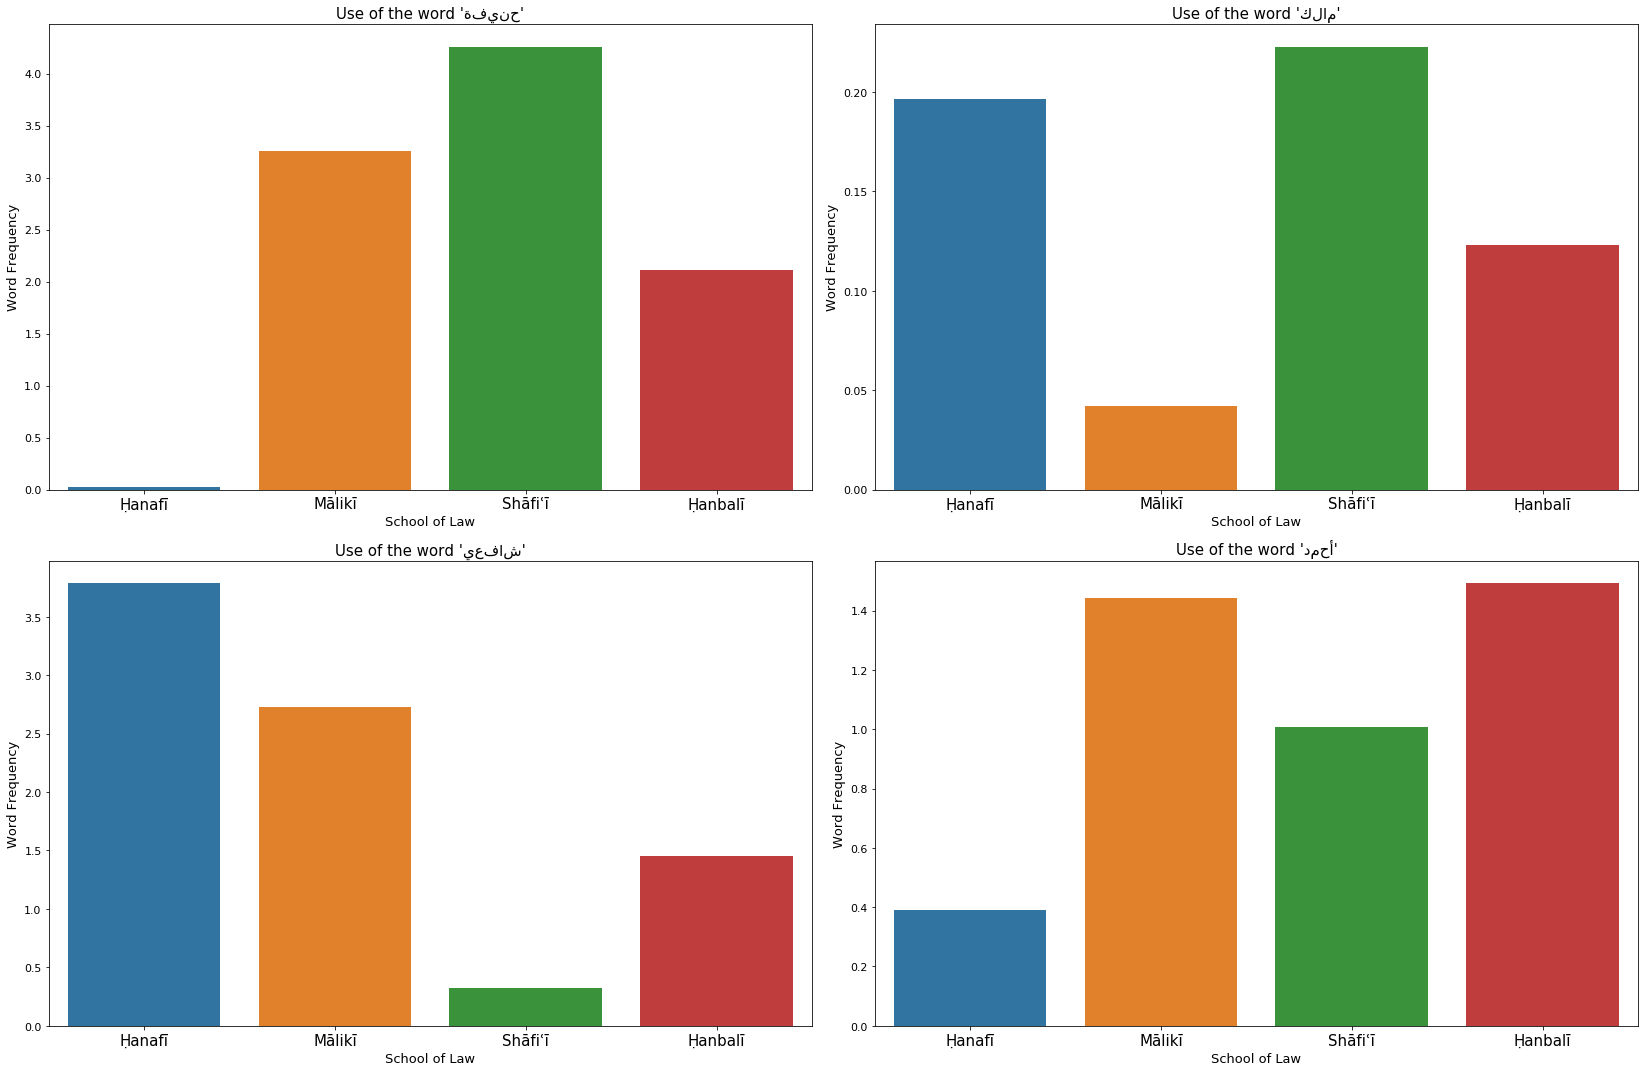

In [7]:
tf_time_of_word(spec_word_dict, word='حنيفة', pattern=re.compile("[أبلو]*حن[ا]*[ي]*ف[ي]*[ة]*"))
tf_time_of_word(spec_word_dict, word='مالك', pattern=re.compile("مالك[يا]*[^هموة][و]*"))
tf_time_of_word(spec_word_dict, word='شافعي', pattern=re.compile("[الو]*شافعي[ة]*"))
tf_time_of_word(spec_word_dict, word='أحمد', pattern=re.compile("[وفاأل]*[اأ]حمد"))

plot_multiple_time(2,2,['حنيفة','مالك','شافعي','أحمد'],'four_imams');

## It's very shocking to see that `Abū Ḥanīfah` and `Shāf'ʿī` are referenced so often. It's bizarre that they have a `TFIDF` of 3.5-4, whereas `Mālik` is at 0.2.

# Question #2: Which *legal terms* do schools use and prefer? We know that each school has their own set of principles, but is that quantitatively apparent from written texts? 

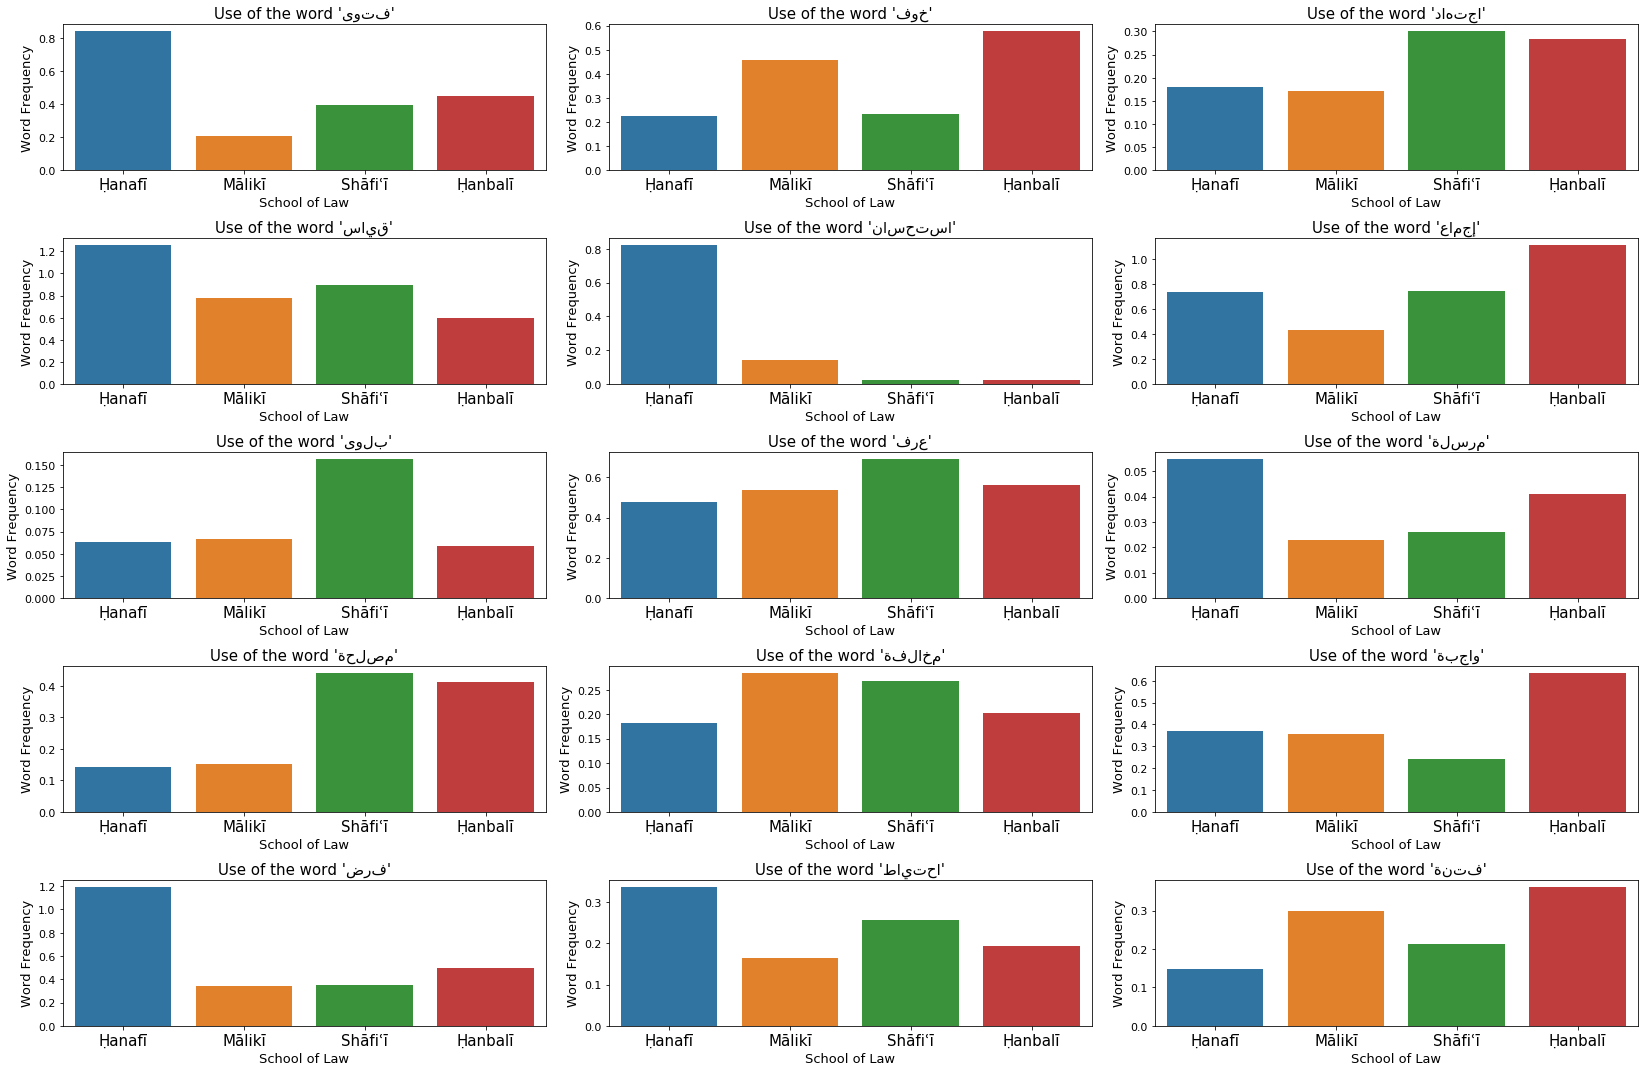

In [8]:
tf_time_of_word(spec_word_dict, word='قياس', pattern=re.compile("[فالو]*[م]*قي[ا]*س"))
tf_time_of_word(spec_word_dict, word='استحسان', pattern=re.compile("[الو]*استحسان"))
tf_time_of_word(spec_word_dict, word='إجماع', pattern=re.compile("[الو]*[اإ]جماع"))
tf_time_of_word(spec_word_dict, word='بلوى', pattern=re.compile("[الوف]*بلو[ٍىي]"))
tf_time_of_word(spec_word_dict, word='عرف', pattern=re.compile("[الوف]*عرف$"))
tf_time_of_word(spec_word_dict, word='مرسلة', pattern=re.compile("[الوف]*مرسلة"))
tf_time_of_word(spec_word_dict, word='مصلحة', pattern=re.compile("[الوف]*مصلحة"))
tf_time_of_word(spec_word_dict, word='مخالفة', pattern=re.compile("[الوف]*مخالفة"))
tf_time_of_word(spec_word_dict, word='واجبة', pattern=re.compile("[الوف]*واجب[ة]*"))
tf_time_of_word(spec_word_dict, word='فرض', pattern=re.compile("[الوف]*فرض[ية]*"))
tf_time_of_word(spec_word_dict, word='احتياط', pattern=re.compile("[البوف]*احتياط[ا]*"))
tf_time_of_word(spec_word_dict, word='فتنة', pattern=re.compile("[البوف]*فتنة"))
tf_time_of_word(spec_word_dict, word='اجتهاد', pattern=re.compile("[الوفبم]*جته[ا]*د[ه]*"))
tf_time_of_word(spec_word_dict, word='خوف', pattern=re.compile("[الويفم]*خ[او]ف[ة]*"))
tf_time_of_word(spec_word_dict, word='فتوى', pattern=re.compile("[الوفم]*فت[اوى]*$"))

plot_multiple_time(5,3,['فتوى','خوف','اجتهاد','قياس','استحسان','إجماع','بلوى','عرف','مرسلة','مصلحة','مخالفة','واجبة','فرض','احتياط','فتنة'],'legal_terms');

## The main thing to see here are the words that are singled out by a certain school. 

|  Ḥanafī  |   Mālikī   |   Shāfiʿī  | Ḥanbali  |
|:--------:|:----------:|:----------:|----------|
|  Fatāwa  | Mukhālafah |   Ijtihād  | Khawf    |
|   Qiyās  |   Fitnah   |    Balwā   | Ijtihād  |
| Istiḥsān |    Khawf   |    ʿUrf    | Ijmāʿ    |
| Mursalah |            |  Maṣlaḥah  | Maṣlaḥah |
|   Farḍ   |            | Mukhālafah | Fitnah   |
|  Iḥtiyāṭ |            |            |          |

# Question #3: How does each school bring narrated proofs? Are some heavy users of narrations of the Prophet? Are some more likely to quote a certain source?

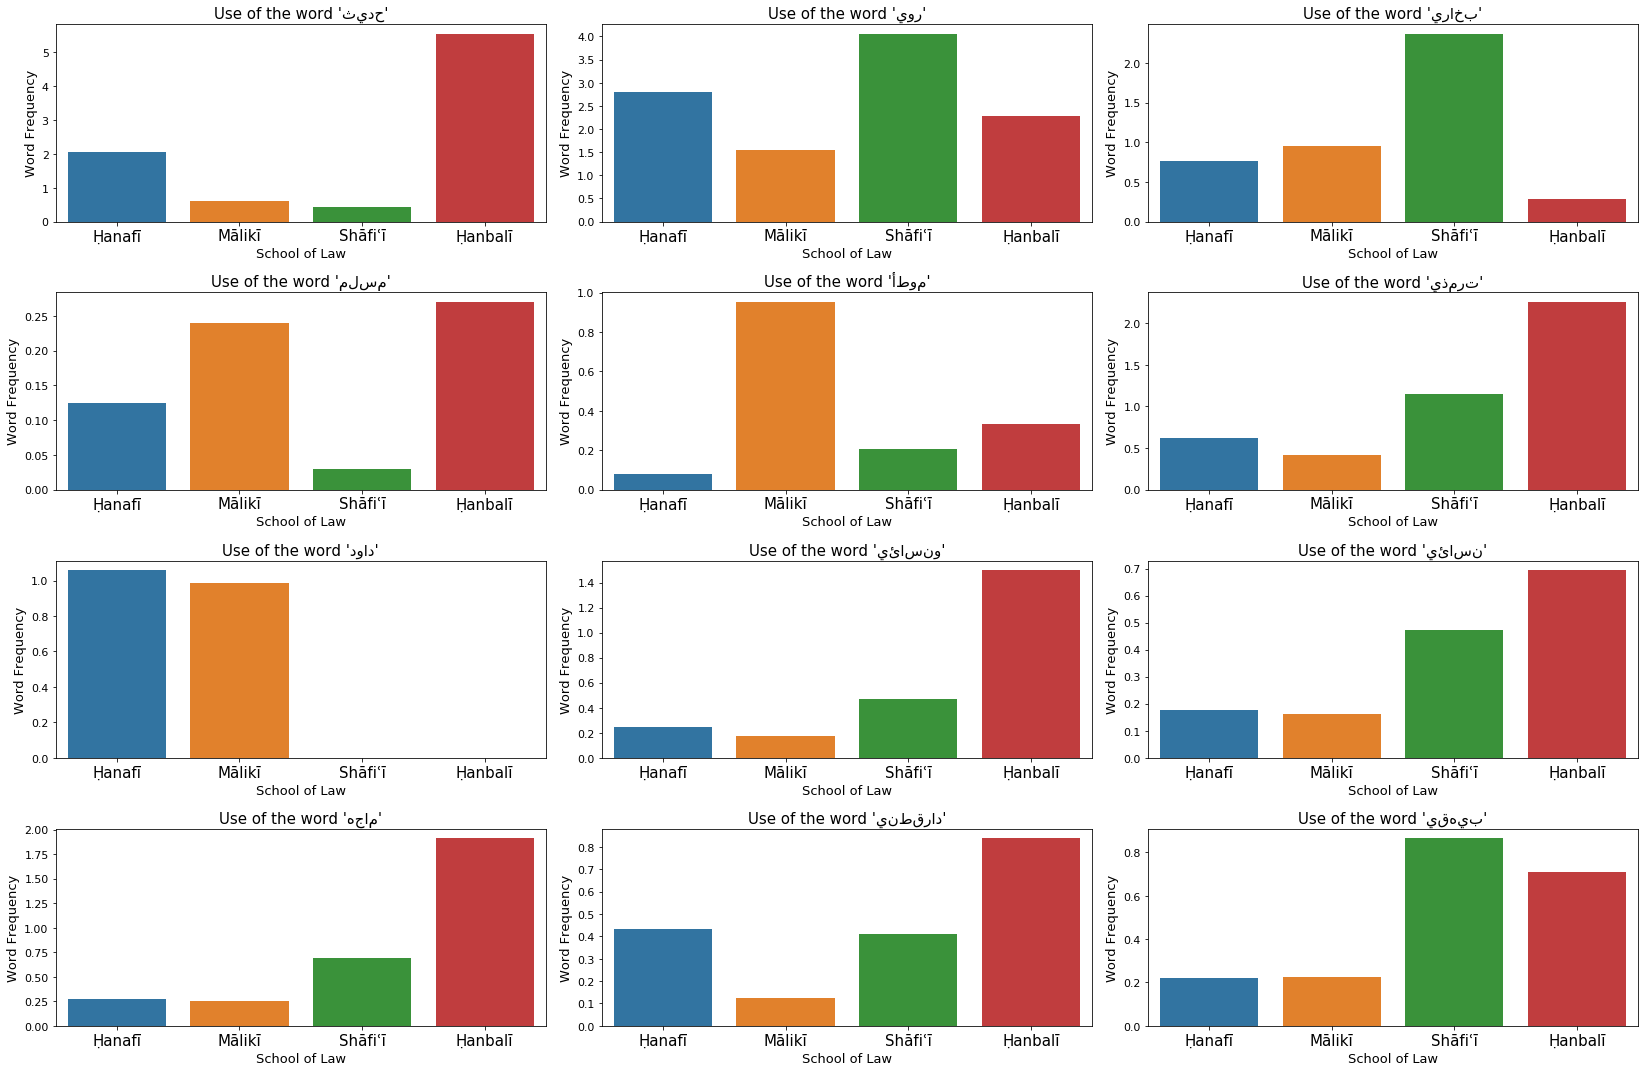

In [9]:
tf_time_of_word(spec_word_dict, word='حديث', pattern=re.compile("[الفو]*[ل]*حد[ي]*ث"), wrong=re.compile("للحدث"))
tf_time_of_word(spec_word_dict, word='روي', pattern=re.compile("رو[ا]*[هيى][ة]*"))
tf_time_of_word(spec_word_dict, word='بخاري', pattern=re.compile("[الو]*بخاري"))
tf_time_of_word(spec_word_dict, word='مسلم', pattern=re.compile("[و]*لمسلم$"))
tf_time_of_word(spec_word_dict, word='موطأ', pattern=re.compile("[الو]*موطأ"))
tf_time_of_word(spec_word_dict, word='ترمذي', pattern=re.compile("[الو]*ترمذي"))
tf_time_of_word(spec_word_dict, word='داود', pattern=re.compile("دا[و]د"))
tf_time_of_word(spec_word_dict, word='ونسائي', pattern=re.compile("[الو]*نسائي"))
tf_time_of_word(spec_word_dict, word='نسائي', pattern=re.compile("[ال]*نسائي"))
tf_time_of_word(spec_word_dict, word='ماجه', pattern=re.compile("[نو]*ماج[هة]"))
tf_time_of_word(spec_word_dict, word='دارقطني', pattern=re.compile("[الو]*دارقطني"))
tf_time_of_word(spec_word_dict, word='بيهقي', pattern=re.compile("[الو]*بيهقي"))

plot_multiple_time(4,3,['حديث','روي','بخاري','مسلم','موطأ','ترمذي','داود','ونسائي','نسائي','ماجه','دارقطني','بيهقي'],'narrations');

# What do we learn about how the schools use narrations?

1. `Ḥanbalīs` and `Shāfiʿīs` tend to quote a lot of narrations.
2. `Shāfiʿīs` particularly rely heavily on Bukhārī and Bayhaqī
3. `Ḥanbalīs` use most books, but are rare to use Bukhārī, Abū Dāwūd, and Muwaṭṭāʾ
4. `Mālikīs` heavily use Muslim, Muwaṭṭāʾ (written by Mālik himself), and Abū Dāwūd.
5. `Ḥanafīs` tend to use Abū Dāwūd and Darquṭnī.

In [10]:
# Used during testing to view dict of values without adding it to the dict used to plot
def printer(spec_word_dict, word, pattern, max_thres=15, *args, **kwargs):
    wrong = kwargs.get('wrong', re.compile("ااااااااا"))

    for category in range(len(all_word_freqs)):
        for w_f in all_word_freqs[category][0]:
            if (pattern.match(w_f[0])) and (not wrong.match(w_f[0])) and (w_f[1] < max_thres):
                print('C: {} - W: {} - F: {}'.format(category,w_f[0],w_f[1]))
                break